# K Means Clustering

In [876]:
import sys
sys.path.append("../")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PCA.pca import calculate_principal_components, project_onto_components
import warnings

warnings.filterwarnings("ignore")
INF = sys.maxsize

In [877]:
# Loading our dataset using pandas
df = pd.read_csv("../data/iris.csv")

# Splitting data
outcomes = np.array(df["species"].map({species: i for i, species in enumerate(df["species"].unique())}))
data = np.array(df.drop(["species"], axis=1).values)

# Normilizing data
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

print(f"Mean of each column: {np.mean(data, axis=0)}\n")
print(f"Standard deviation of each column: {np.std(data, axis=0)}")

Mean of each column: [-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]

Standard deviation of each column: [1. 1. 1. 1.]


In [878]:
def k_means(data, k, iterations=1):
    best_clustering = None
    best_clustering_variance = INF
    previous_cluster_classifications = None
    current_cluster_classifications = np.zeros(data.shape[0])
    
    for _ in range(iterations):
        # Select random points
        current_clustering = np.array([[
            np.random.uniform(np.min(row), np.max(row)) for row in data.T
        ] for _ in range(k)])

        # Classify the data points based on the closest cluster
        for i, data_point in enumerate(data):
            current_cluster_classifications[i] = np.argmin([np.linalg.norm(data_point - cluster) for cluster in current_clustering])

        # Keep moving the clusters to the mean of the clusters until the classifications dont change any more
        while (previous_cluster_classifications != current_cluster_classifications).any():
            previous_cluster_classifications = current_cluster_classifications.copy()

            # Moving the clusters to the mean of the clusters
            current_clustering = np.array([
                np.nan_to_num(np.nanmean(
                    data[np.where(current_cluster_classifications == i)],
                    axis=0,
                ), nan=0)
            for i in range(k)])
            
            # Classify the data points based on the closest cluster
            for i, data_point in enumerate(data):
                current_cluster_classifications[i] = np.argmin([np.linalg.norm(data_point - cluster) for cluster in current_clustering])

        # Calculate the variance of the cluster classifications
        current_variance = np.sum(
            [np.var(data[np.where(current_cluster_classifications == i)] if len(np.where(current_cluster_classifications == i)) != 0 else INF)
        for i in range(k)])

        # Replace the current best clustering if the new cluster has a lower variance
        if current_variance < best_clustering_variance:
            best_clustering = current_clustering
            best_clustering_variance = current_variance

    return best_clustering

In [879]:
def closest_cluster(data, clusters):
    return np.array([
        np.argmin([np.linalg.norm(data_point - cluster) for cluster in clusters]) for data_point in data
    ])

In [880]:
cluster_centers = k_means(data, 3, iterations=10)

In [881]:
components, _ = calculate_principal_components(data, components=2)
cluster_classifications = closest_cluster(data, cluster_centers)
projected_data = project_onto_components(data, components)
projected_cluster_centers = project_onto_components(cluster_centers, components)

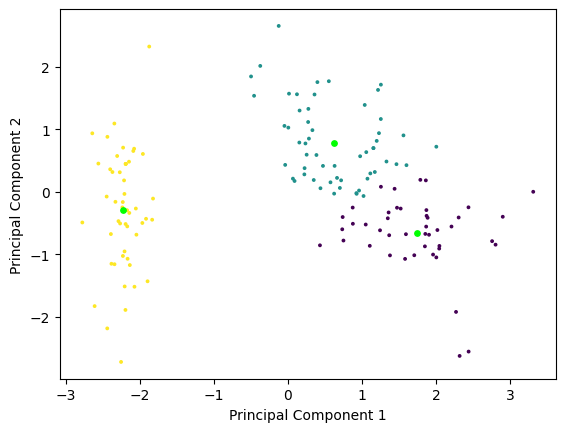

In [882]:
plt.xlabel(f"Principal Component 1")
plt.ylabel(f"Principal Component 2")
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=cluster_classifications, s=3)
plt.scatter(projected_cluster_centers[:, 0], projected_cluster_centers[:, 1], c="#00FF00", s=15)

plt.show()